# Binary Classification: IMDB Dataset 
    
    

## Introduction:
   - The purpose of this report is to explore and solve the binary classification problem using the IMDB dataset. In order to do that, we have to create a deep learning model that classifies if a movie review (from the dataset) is positive or negative (good or bad) on the basis of the the text content of the movie reviews. The dataset has 50,000 reviews and these reviews will be split into two where half the reviews is to train the model and the other is to test the model. This is essential as a machine learning model should not be tested on the same data it was trained with as that is not a good indicator of whether the model is working well or not as it needs to work well for data it has not seen before otherwise we do not know for certain if the model is working properly. 
    
    

In [98]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

- Above, the data set has been loaded. The num_words has also been set to 10,000 which goes to say that in the training data, only the top 10,000 words that are most used will be kept. This is done so that the words that do not show up often and are considered rare are eliminated which lets us work with vector data which is of good and manageable size.

In [99]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [56]:
train_labels[0]

1

In [57]:
max([max(sequence) for sequence in train_data])

9999

- Since we are only taking in the top 10,000 words, the word index cannot be greater than 10,000.   


## Preparing the Data

- A neural network cannot be given a list of integers. The lists have to be turned into tensors. To do that, we can one-hot encode the lists to turn them into vectors of 0's and 1's which will then allow us to use a Dense layer on the network which is able to handle floating point vector data. 

In [58]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [80]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

- From the output above, you can see what the one-hot encoding has done to the list. 

## Building the Network

- Vectors are the input data and the labels are scalar. Due to this, we will use network that has a stack of fully connected Dense layers with relu activations. Each of the dense layers takes in a number of hidden units which is a dimension as pertaining to the representation space of that layer. The more hidden units you have, the more complex representations can be learned by the network. This does come with the downside of making your network more expensive computationally as well as leading the network to learn patterns that are not needed or wanted. I am going to use the relu activation fucntion for the intermediate layers and a sigmoid activation function for the last one as we want the output to be a probability which will show us what the chances are for the review to be positive. We use the relu activation function because if we did not, our layers would only be able to learn linear transformations of the data that is inputed. Without this activation, the hypothesis space will be too restricted. To actually benefit from multiple layers and deep representations leading to a healthy and sufficient hypothesis space, we need an activation function which in this case is relu. 

In [46]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))




##  Optimizer


In [61]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])





- Here,  binary_crossentropy loss is being used becuase crossentropy is considered the most fitting choice when dealing with models with outputs that are probability. 

## Losses and Metrics

In [60]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])




## Validation Set 

In [59]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]



- Here a validation set is being created by keeping aside 10,000 samples from the training data so we can see how accurate the model is. 

## Training the Model

- Here 20 epochs are run with a batch size of 512. We can look over this progress by fitting it to our validation set.

In [62]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 13s 860us/step - loss: 0.5144 - acc: 0.7779 - val_loss: 0.3898 - val_acc: 0.8571
Epoch 2/20
15000/15000 [==============================] - 10s 660us/step - loss: 0.2989 - acc: 0.9004 - val_loss: 0.3016 - val_acc: 0.8862
Epoch 3/20
15000/15000 [==============================] - 9s 621us/step - loss: 0.2159 - acc: 0.9294 - val_loss: 0.2769 - val_acc: 0.8914
Epoch 4/20
15000/15000 [==============================] - 9s 613us/step - loss: 0.1720 - acc: 0.9436 - val_loss: 0.2763 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 10s 666us/step - loss: 0.1374 - acc: 0.9556 - val_loss: 0.2819 - val_acc: 0.8890
Epoch 6/20
15000/15000 [==============================] - 9s 571us/step - loss: 0.1164 - acc: 0.9625 - val_loss: 0.2980 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 10s 651us/step - loss: 0.0967 - acc: 0.9716 - val_loss: 0.317

In [63]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [64]:
history_dict['loss']

[0.5144458062648773,
 0.2988875744183858,
 0.21591483409404755,
 0.171989404241244,
 0.13735977687835693,
 0.11636448181470235,
 0.09672847954034805,
 0.08072961075703303,
 0.06781387878259024,
 0.05653419173558553,
 0.045279072181383766,
 0.03895650273660819,
 0.03239997134109338,
 0.02680264262954394,
 0.02092416463891665,
 0.016395128359397253,
 0.012019597154855729,
 0.011082635259628297,
 0.00806912536919117,
 0.004899850409726302]

## Plot of Training and Validation Loss

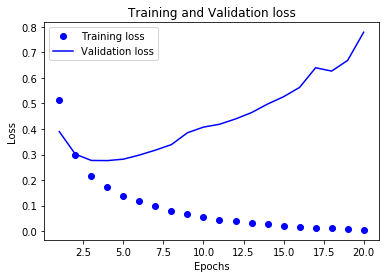

In [73]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- The training loss decreases with every epoch as seen above which is a good sign as it shows that our stochastic gradient descent is optimizing. On the other hand, the validation loss is first decreasing but starts to increase from about the third or fourth epoch. This goes to say that even though our model works well for the training set, it may not perform as well on data it has not seen before. What we are seeing here is overfitting. After the third or fourth epoch, we are overoptimizing on the training data which gives us representation that pertains solely to the training data and does not generalize to data other than the one from the training set. One of the ways to avoid overfitting is to stop training the data after three or four epochs which is done later below. 

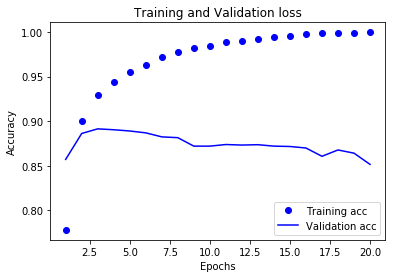

In [108]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- Here we can see the same thing. The training accuracy is increasing with every epoch but the validation accuracy seem to start decreasing after the third or fourth epoch. 

## Testing Trained Model on Test Set

##### 1.1 Normal example from class/book:

In [100]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16 ,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 13s 537us/step - loss: 0.4496 - acc: 0.8165
Epoch 2/4
25000/25000 [==============================] - 10s 396us/step - loss: 0.2552 - acc: 0.90946
Epoch 3/4
25000/25000 [==============================] - 10s 394us/step - loss: 0.1969 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 13s 503us/step


[0.2946075964450836, 0.88328]

In [71]:
model.predict(x_test)

array([[0.1381952 ],
       [0.99971014],
       [0.2812362 ],
       ...,
       [0.07172955],
       [0.04231447],
       [0.46861428]], dtype=float32)

##### 1.2 Increasing the number of hidden units of layers:

In [79]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32 ,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 35s 1ms/step - loss: 0.4179 - acc: 0.8190
Epoch 2/4
25000/25000 [==============================] - 32s 1ms/step - loss: 0.2364 - acc: 0.9114
Epoch 3/4
25000/25000 [==============================] - 40s 2ms/step - loss: 0.1853 - acc: 0.9312
Epoch 4/4
25000/25000 [==============================] - 37s 1ms/step


[0.36227199007987976, 0.86568]

In [72]:
test_labels


array([0, 1, 1, ..., 0, 0, 0])

##### 1.3 Replacing sigmoid activation fuction with tanh:

In [83]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32 ,activation = 'relu'))
model.add(layers.Dense(1, activation = 'tanh'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 38s 2ms/step - loss: 0.4700 - acc: 0.8044
Epoch 2/4
25000/25000 [==============================] - 34s 1ms/step - loss: 0.2621 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 39s 2ms/step - loss: 0.2061 - acc: 0.9233
Epoch 4/4
25000/25000 [==============================] - 37s 1ms/step


[0.5275805160856247, 0.81144]

##### 1.4 Removing one layer :

In [110]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1 ,activation = 'sigmoid'))


model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - ETA: 0s - loss: 0.1411 - acc: 0.824 - 15s 616us/step - loss: 0.1403 - acc: 0.8255
Epoch 2/4
25000/25000 [==============================] - 11s 451us/step - loss: 0.0791 - acc: 0.9114
Epoch 3/4
25000/25000 [==============================] - 13s 529us/step - loss: 0.0615 - acc: 0.9307
Epoch 4/4
25000/25000 [==============================] - 15s 616us/step


[0.08544904789209366, 0.88576]

##### 1.5 Using a tanh activation function instead of relu:

In [92]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16 ,activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 15s 613us/step - loss: 0.4574 - acc: 0.8327
Epoch 2/4
25000/25000 [==============================] - 11s 445us/step - loss: 0.2630 - acc: 0.9130
Epoch 3/4
25000/25000 [==============================] - 10s 414us/step - loss: 0.1911 - acc: 0.9345
Epoch 4/4
25000/25000 [==============================] - 13s 538us/step


[0.30436842514038087, 0.88272]

##### 1.6 More epochs:

In [107]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16 ,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 9, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/9
25000/25000 [==============================] - 17s 661us/step - loss: 0.4565 - acc: 0.8199
Epoch 2/9
25000/25000 [==============================] - 11s 424us/step - loss: 0.2588 - acc: 0.9080
Epoch 3/9
25000/25000 [==============================] - 10s 397us/step - loss: 0.1980 - acc: 0.9288
Epoch 4/9
25000/25000 [==============================] - 10s 388us/step - loss: 0.1657 - acc: 0.9425
Epoch 5/9
25000/25000 [==============================] - 10s 393us/step - loss: 0.1451 - acc: 0.9474
Epoch 6/9
25000/25000 [==============================] - 10s 397us/step - loss: 0.1237 - acc: 0.9578
Epoch 7/9
25000/25000 [==============================] - 10s 391us/step - loss: 0.1095 - acc: 0.9620
Epoch 8/9
25000/25000 [==============================] - 10s 390us/step - loss: 0.0954 - acc: 0.9686
Epoch 9/9
25000/25000 [==============================] - 13s 526us/step


[0.41756417843341825, 0.86624]

##### 1.7 Decreasing the number of hidden units of layers:

In [109]:
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4 ,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 9s 349us/step - loss: 0.5879 - acc: 0.6933
Epoch 2/4
25000/25000 [==============================] - 5s 184us/step - loss: 0.4923 - acc: 0.8391
Epoch 3/4
25000/25000 [==============================] - 5s 181us/step - loss: 0.4480 - acc: 0.8860
Epoch 4/4
25000/25000 [==============================] - 8s 314us/step


[0.45832399376869204, 0.87036]

### Effects of changing different hyper parameters:
- 1.1 uses the parameters recommended by the book and comes up with an accuracy of 88%. I then tweaked different hyper parameters in hopes to increase the accuracy and decrease the loss as much as possible. Increasing and decreasing the number of hidden units in a layer (1.2 & 1.7 respectively) did not effect the outcome much as both their accuracies were about 87% but the example with the higher hidden units had a much lower loss than one with lesser hidden units. This is due to the fact that there was an overfitting and increasing hidden units should be done when trying to scale up and trying to overfit which is not what we want in this case. In 1.3, I replaced the sigmoid layer with tanh and that lowered the accuracy to 81% and increased the loss from 0.36 to 0.52. This was expected as it is essential for binary classification problem to end with a dense layer with 1 unit and a sigmoid activation function as the output of the network should be a scalar value between 0 and 1 (probability). In 1.4, I reduced the number of layers by 1 removing the relu layer which caused the accuracy to increase by 1% and brought down the loss by a lot. Since there is overfitting present, one of the ways to prevent it is reducing the network and in this case a layer has been removed thus reducing the network and leading to more accurate results and less loss. In 1.5, I replaced the relu activation functions with the tanh activation function which resulted in almost the same values as 1.1. We should still use relu as its range goes from 0 to infinity and in this case as we are not dealing with negative values so relu is perfect for that. Moreover,  relu is also the mose popular and used activation function. In 1.6, I decided to increase the epochs from 4 to 9 and the accuracy dropped and loss increased compared to 1.1. This was once again expected as overfitting is present and to reduce that, the number of epochs need to be decreased, not increased. 











## Combating Overfitting 
- Overfitting occurs when the model fits the data too well and learns patterns of that specific data thus not being able to genralize when introduced to new data. There are four ways to reduce this: Getting more data, reducing the capacity of the network, weight regularisation and adding dropout. 

### 1. Reducing the Network
- Decreasing the size of the network is one of the ways to reduce overfitting. The amount of learnable paramters that a model has is the networks capacity. If that is reduced, the model will not be able to learn the mapping as easily which will benefit us in this case. 

In [112]:
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [122]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorise data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Split into partial and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [115]:
# Model
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.5012 - acc: 0.7971 - val_loss: 0.3862 - val_acc: 0.8637
Epoch 2/20
15000/15000 [==============================] - 11s 757us/step - loss: 0.2996 - acc: 0.9025 - val_loss: 0.3048 - val_acc: 0.8849
Epoch 3/20
15000/15000 [==============================] - 11s 705us/step - loss: 0.2155 - acc: 0.9283 - val_loss: 0.2778 - val_acc: 0.8913
Epoch 4/20
15000/15000 [==============================] - 10s 669us/step - loss: 0.1716 - acc: 0.9433 - val_loss: 0.2776 - val_acc: 0.8886
Epoch 5/20
15000/15000 [==============================] - 9s 592us/step - loss: 0.1386 - acc: 0.9553 - val_loss: 0.2811 - val_acc: 0.8887
Epoch 6/20
15000/15000 [==============================] - 10s 673us/step - loss: 0.1174 - acc: 0.9621 - val_loss: 0.2996 - val_acc: 0.8858
Epoch 7/20
15000/15000 [==============================] - 9s 613us/step - loss: 0.0972 - acc: 0.9721 - val_loss: 0.3161

In [116]:
# A smaller model
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
smaller_model_history = smaller_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 399us/step - loss: 0.6195 - acc: 0.6439 - val_loss: 0.5799 - val_acc: 0.6409
Epoch 2/20
15000/15000 [==============================] - 5s 309us/step - loss: 0.5273 - acc: 0.7817 - val_loss: 0.5251 - val_acc: 0.7878
Epoch 3/20
15000/15000 [==============================] - 4s 292us/step - loss: 0.4787 - acc: 0.8467 - val_loss: 0.4962 - val_acc: 0.8243
Epoch 4/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.4440 - acc: 0.8848 - val_loss: 0.4767 - val_acc: 0.8543
Epoch 5/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.4167 - acc: 0.9112 - val_loss: 0.4752 - val_acc: 0.8294
Epoch 6/20
15000/15000 [==============================] - 5s 302us/step - loss: 0.3945 - acc: 0.9287 - val_loss: 0.4684 - val_acc: 0.8392
Epoch 7/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.3749 - acc: 0.9421 - val_loss: 0.4617 - 

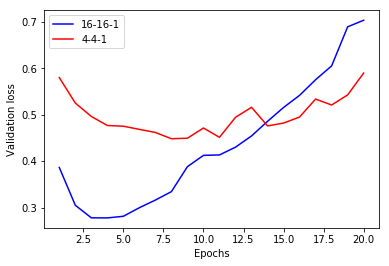

In [118]:
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
smaller_model_val_loss = smaller_model_history.history['val_loss']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss, 'b', label='16-16-1')
plt.plot(epochs, smaller_model_val_loss, 'r', label='4-4-1')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- As seen from the figure above, the validation loss of the smaller network is flatter than the original and the loss starts to increase on a much later epoch for the smaller network as opposed to the original. Nonetheless, the original model reaches a nuch smaller optimal loss compared to the smaller model as the smaller model does not have enough capacity. 

- On the other hand, if we had made a bigger network rather than a smaller one and compared it to the original, the opposite would happen. The bigger model would overfit quicker than the original and would increase at a higher rate. The degree of the overfitting of the bigger model would be greater than that of the original. The bigger model would fit the training data due to its huge capacity, but it overfits quicker as it is not able to generalize and learns and follows patterns of the training data too closely. 

### 2. Weight Regularisation
- Another way to reduce overfitting by reducing the wieghts by adding a regulizer.

In [120]:
from keras import regularizers
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer = regularizers.l2(0.001), 
                          activation='relu', 
                          input_shape=(10000,)))
l2_model.add(layers.Dense(16, 
                       kernel_regularizer = regularizers.l2(0.001),
                       activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

l2_history = l2_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 15s 1ms/step - loss: 0.5426 - acc: 0.7873 - val_loss: 0.4135 - val_acc: 0.8729
Epoch 2/20
15000/15000 [==============================] - 10s 672us/step - loss: 0.3499 - acc: 0.9017 - val_loss: 0.3507 - val_acc: 0.8874
Epoch 3/20
15000/15000 [==============================] - 10s 637us/step - loss: 0.2810 - acc: 0.9235 - val_loss: 0.3395 - val_acc: 0.8845
Epoch 4/20
15000/15000 [==============================] - 9s 599us/step - loss: 0.2470 - acc: 0.9347 - val_loss: 0.3502 - val_acc: 0.8816
Epoch 5/20
15000/15000 [==============================] - 9s 608us/step - loss: 0.2271 - acc: 0.9417 - val_loss: 0.3344 - val_acc: 0.8868
Epoch 6/20
15000/15000 [==============================] - 10s 648us/step - loss: 0.2114 - acc: 0.9496 - val_loss: 0.3556 - val_acc: 0.8799
Epoch 7/20
15000/15000 [==============================] - 8s 538us/step - loss: 0.2033 - acc: 0.9529 - val_loss: 0.4284 

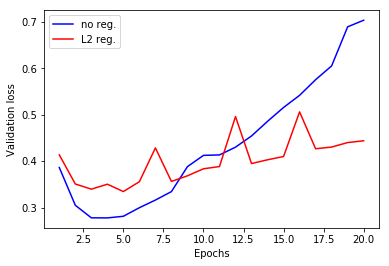

In [121]:
val_loss = history.history['val_loss']
l2_val_loss = l2_history.history['val_loss']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss, 'b', label='no reg.')
plt.plot(epochs, l2_val_loss, 'r', label='L2 reg.')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- As seen above, the L2-reg. model is more resistant to overfitting as opposed to the original even with the same number of parameters. 

## Conclusion:
- Before creating the network, the data must be processed to tensorial form in order to put it in the neural network. A bunch of Dense layers along with the relu activation function can then be used to solve many problems, which in this case was to find out whether a movie review was good or bad. This is a binary classification problem which means that the model must end with a Dense layer utilizing the sigmoid activation function with one unit as the output we are looking for is a  probability between 0 and 1. Due to this scalar sigmoid output, we used binary_crossentropy as our loss function. As the model gets better at its training data, they start to learn pattern specific to that data and when used on a new test data, the results start to turn out not too accurate. That is why it is essential to monitor results of your model outside of just your training data set as that is not an accurate representation of the effectiveness of your model. To reduce overfitting, I used two different methods: reducing the network and weight regularisation and they both helped give more accurate results than the original model. The reduction of the network can also be seen in the changing of the hyper parameters above in model 1.4 where I removed a whole layer as opposed to the original which gave the highest accuracy: 89% and the lowest loss: .09.  